In [2]:
import spectral.io.envi as envi
import matplotlib.pyplot as plt
from spectral import *
import numpy as np
import scipy.io
from PIL import Image
import os
print(os.getcwd())

cur_path =   'D:\DataSets\hyperspectraldatasets\lowlight_hyperspectral_datasets\captured_1_8\\2021-01-08_13-18-38_123_orange2_zao_1ms\capture\\2021-01-08_13-18-38_123_orange2.hdr'
img = envi.open(cur_path)
array = img.load()
print(type(array)) #<class 'spectral.image.ImageArray'> 


D:\DataSets\hyperspectraldatasets\lowlight_hyperspectral_datasets\data_preprocess


D:\ProgramData\Anaconda3\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


<class 'spectral.image.ImageArray'>


- 将每三个通道保存为一个rgb，jpg格式的图像


方法1：对array进行操作

In [48]:
bandnum = array.shape[2]
print(bandnum)
indexarray = np.arange(0, bandnum, 3)
indexlist = list(indexarray)
print(indexlist)
print(len(indexlist))
indexlist = indexlist[40:-1] #去掉前120个band
print(len(indexlist))

img_path = 'rgbimgs'
count = 1
for i in list(indexlist):

    threeband = array[:,:,(i,i+1,i+2)]
    #print(threeband.shape)
    #print(type(threeband))
    threeband = np.array(threeband)
    #threeband = threeband
    #print(type(threeband))
    #print(threeband.dtype)
    
    #对数据做归一化处理
    threeband = (threeband/2048)*255 #将12位数据转换为8bit数据进行处理
    image_name = img_path + '/' + str(count) + '.jpg'
    count += 1
    image = Image.fromarray(np.uint8(threeband)) #这里不能强制转换，应该先做一个归一化
    image.save(image_name)
#plt.imshow(image)

448
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447]
150
109


方法二，对img进行操作

In [52]:
bandnum = array.shape[2]
print(bandnum)
indexarray = np.arange(0, bandnum, 3)
indexlist = list(indexarray)
print(indexlist)
print(len(indexlist))
indexlist = indexlist[40:-1]
print(len(indexlist))

img_path = 'rgbimgs1'
count = 1

for i in list(indexlist):

    threeband = img.read_band([i, i+1, i+2])
    print(threeband.shape)
    print(type(threeband))
    
    threeband = threeband.swapaxes(1,2) #调换最后两个维度的信息
    print(threeband.shape)
    #threeband = threeband
    #print(type(threeband))
    #print(threeband.dtype)
    
    #对数据做归一化处理
    threeband = (threeband/2048)*255 #将12位数据转换为8bit数据进行处理
    image_name = img_path + '/' + str(count) + '.jpg'
    count += 1
    image = Image.fromarray(np.uint8(threeband)) #这里不能强制转换，应该先做一个归一化
    image.save(image_name)

448
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447]
150
109
(390, 3, 512)
<class 'numpy.ndarray'>
(390, 512, 3)
(390, 3, 512)
<class 'numpy.ndarray'>
(390, 512, 3)
(390, 3, 512)
<class 'numpy.ndarray'>
(390, 512, 3)
(390, 3, 512)
<class 'numpy.ndarray'>
(390, 512, 3)
(390, 3, 512)
<class 'numpy.ndarray'>
(390, 512, 3)
(390, 3, 512)
<

<class 'numpy.ndarray'>
(392, 512, 3)
uint8


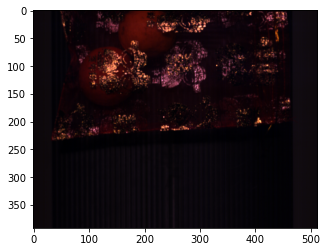

In [32]:
#读取一张图片
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 使用PIL库和numpy是只是为了快速得到一个可以用于保存为图片的数组，即从现有的图片直接转换成数组
im = Image.open("test.png")  # 打开图片
im_array = np.array(im)  # 将图片转化为numpy数组
print(type(im_array))
print(im_array.shape)
print(im_array.dtype)
plt.imshow(im_array)  # 绘制图片
plt.savefig("out_plt2.png")  # 保存图片

In [53]:
dataset_root_path = '../captured_1_8/'
img_path_name_list = os.listdir(dataset_root_path)  # 得到path目录下所有图片名称的一个list

pathlistlen = len(img_path_name_list)
print(len(img_path_name_list))

print(type(img_path_name_list))
print(img_path_name_list[0])

img_name_list_hdr = []
for i in range(pathlistlen ):
    img_name_list_hdr.append(dataset_root_path + img_path_name_list[i] + '/capture/' + img_path_name_list[i][0:31] + '.hdr')
    print(img_name_list_hdr[i])

img_name_list_0_1ms = []
img_name_list_15ms = []
img_name_list_9ms = []
img_name_list_1ms = []

target_substring = '0.1ms'
target_substring_1ms = '1ms'

target_substring_15ms = '15ms'
target_substring_9ms = '9ms'

for i in range(len(img_name_list_hdr) ):
    if target_substring in img_name_list_hdr[i]:
        img_name_list_0_1ms.append(img_name_list_hdr[i])
    if target_substring_15ms in img_name_list_hdr[i]:
        img_name_list_15ms.append(img_name_list_hdr[i])
    if target_substring_9ms in img_name_list_hdr[i]:
        img_name_list_9ms.append(img_name_list_hdr[i])
    if target_substring_1ms in img_name_list_hdr[i] and target_substring not in img_name_list_hdr[i]:
        img_name_list_1ms.append(img_name_list_hdr[i])

print('len of 0.1ms list',len(img_name_list_0_1ms))
for i in range(len(img_name_list_0_1ms)):
    print(img_name_list_0_1ms[i])

print('len of 1ms list',len(img_name_list_1ms))
for i in range(len(img_name_list_1ms)):
    print(img_name_list_1ms[i])

assert len(img_name_list_15ms) == len(img_name_list_0_1ms)


splited_dataset_root_path = '../hyper2rgb_dataset'
splited_dataset_noise_path = splited_dataset_root_path + '/noise/'
splited_dataset_clean_path = splited_dataset_root_path + '/clean/'

image_count = 0
for i in range(len(img_name_list_15ms)):
    filename_0_1ms = img_name_list_0_1ms[i]
    filename_15ms = img_name_list_15ms[i]
    filename_9ms = img_name_list_9ms[i]
    filename_1ms = img_name_list_1ms[i]

    spectral_img_0_1ms = envi.open(filename_0_1ms)
    spectral_img_15ms = envi.open(filename_15ms)
    spectral_img_9ms = envi.open(filename_9ms)
    spectral_img_1ms = envi.open(filename_1ms)


    spectral_img_0_1ms_band_count = spectral_img_0_1ms.shape[2]
    spectral_img_15ms_band_count = spectral_img_15ms.shape[2]

    if spectral_img_0_1ms_band_count != spectral_img_15ms_band_count:
        continue
        
    #对于一幅图像来说
    print(indexlist)
    for i in list(indexlist):

        single_band_noise_img = spectral_img_1ms.read_band([i, i+1, i+2])

        #print(single_band_noise_img.shape)
        #print(type(single_band_noise_img))

        single_band_noise_img = single_band_noise_img.swapaxes(1,2) #调换最后两个维度的信息
        #print(single_band_noise_img.shape)
        #threeband = threeband
        #print(type(threeband))
        #print(threeband.dtype)

        #对数据做归一化处理
        single_band_noise_img = (single_band_noise_img/2048)*255 #将12位数据转换为8bit数据进行处理

        image = Image.fromarray(np.uint8(threeband)) #这里不能强制转换，应该先做一个归一化
        
        image_name = splited_dataset_noise_path + str(image_count) + '.png'
        image.save(image_name)
        
        single_band_clean_img = spectral_img_15ms.read_band([i, i+1, i+2])
        single_band_clean_img = single_band_clean_img.swapaxes(1,2) #调换最后两个维度的信息
        single_band_clean_img8bit = single_band_clean_img.astype(np.float)
        single_band_clean_img8bit = (single_band_clean_img8bit / 2048) * 255 #归一化
        single_band_clean_img8bit = single_band_clean_img8bit.astype(np.uint8)

        im_clean = Image.fromarray(single_band_clean_img8bit)
        image_name_clean = splited_dataset_clean_path + str(image_count) + '.png'
        im_clean.save(image_name_clean)

        image_count += 1

48
<class 'list'>
2021-01-08_13-17-07_123_orange2_zao_15ms
../captured_1_8/2021-01-08_13-17-07_123_orange2_zao_15ms/capture/2021-01-08_13-17-07_123_orange2.hdr
../captured_1_8/2021-01-08_13-18-38_123_orange2_zao_1ms/capture/2021-01-08_13-18-38_123_orange2.hdr
../captured_1_8/2021-01-08_13-20-05_123_orange2_zao_9ms/capture/2021-01-08_13-20-05_123_orange2.hdr
../captured_1_8/2021-01-08_13-21-14_123_orange2_zao_0.1ms/capture/2021-01-08_13-21-14_123_orange2.hdr
../captured_1_8/2021-01-08_13-28-34_123_orange2_guodong_0.1ms/capture/2021-01-08_13-28-34_123_orange2.hdr
../captured_1_8/2021-01-08_13-32-45_123_orange2_guodong_1ms/capture/2021-01-08_13-32-45_123_orange2.hdr
../captured_1_8/2021-01-08_13-34-03_123_orange2_guodong_9ms/capture/2021-01-08_13-34-03_123_orange2.hdr
../captured_1_8/2021-01-08_13-35-03_123_orange2_guodong_15ms/capture/2021-01-08_13-35-03_123_orange2.hdr
../captured_1_8/2021-01-08_13-36-30_123_orange2_twoorage_15ms/capture/2021-01-08_13-36-30_123_orange2.hdr
../captured_1

[120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444]
[120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390